# Phase transitions

## Test: distance to true sequences as function of temperature

### Imports


In [ ]:
import numpy as np
import os
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt

from hamming_dist import hamming_dist, hamming_dist_oneseq_to_batch_new
from seq_utils import letters_to_nums, sequences_from_fasta, one_hot_seq_batch
from PCA_func import plot_projected_pca, plot_pca_of_sequences, kl_divergence_between_pca_distributions, return_pca_results, average_minimum_distance, symmetric_average_minimum_distance


matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
font = {'size'   : 18}

matplotlib.rc('font', **font)

In [3]:
def distance(gen_seqs, ref_seqs):
    """
    Calculate the mean Hamming distance from each generated sequence to a batch of reference sequences.

    Args:
        gen_seqs (list of str): List of generated sequences.
        ref_seqs (list of str): List of reference sequences.

    Returns:
        float: Mean of average Hamming distances between each generated sequence and all reference sequences.
    """
    distances = []
    for seq in gen_seqs:
        # hamming_dist_oneseq_to_batch should return a list of distances between seq and each ref_seq
        dists = hamming_dist_oneseq_to_batch_new(seq, ref_seqs)
        avg_dist = np.mean(dists)
        distances.append(avg_dist)

    return np.mean(distances)

## Import generated sequences and train sequences as reference

In [8]:
# -------------- Load train sequences ----------------
# Load train sequences
family = 'jdoms_bacteria_train2'
cwd = '/Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main'
filename = cwd + f'/CODE/DataAttentionDCA/jdoms/{family}.fasta'

#filename = cwd + f'\CODE\DataAttentionDCA\jdoms\{family}.fasta'

train_sequences = sequences_from_fasta(filename)
train_sequences_num = [letters_to_nums(seq) for seq in train_sequences]

# -------------- Load generated sequences ----------------
cwd = '/Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main'
#cwd='C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main'
#save_dir = "generated_sequences"
save_dir = "gill_generated_sequences"

#betas = [0.01, 0.1, 0.5, 1, 2, 4, 8]
betas = [0.01, 0.1, 0.5, 1.5, 2, 5]
distances = []

for b in tqdm(betas):
    #filename = f'gen_seqs_randinit_Ns30000_b{b}'
    filename = f'gill_generated_sequences_20000_beta_{b}'
    output_file = cwd + f'/CODE/AttentionDCA_python/src/PLM/{save_dir}/{filename}.npy'
    gen_sequences = np.load(output_file)
    distances.append(distance(gen_sequences[::63], train_sequences_num[::63]))
distances = np.array(distances)

100%|██████████| 6/6 [00:02<00:00,  2.54it/s]


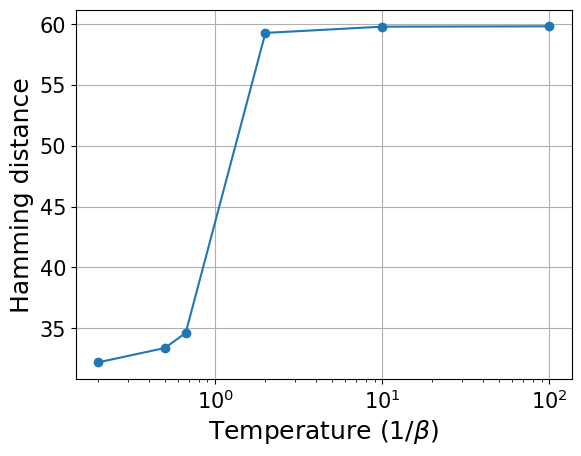

In [9]:
# -------------- Plot phase transition ----------------
# plot distances vs temperature 1/beta
temps = [1/b for b in betas]
plt.plot(temps, distances, marker='o')
plt.xscale('log')
plt.xlabel(r'Temperature ($1/\beta$)')
#plt.xlabel('Beta')
plt.ylabel('Hamming distance')
#plt.title('Phase Transition for plm generated sequences')
plt.grid()
#plt.savefig(cwd + f'/CODE/AttentionDCA_python/src/PLM/{save_dir}/phase_transition.png')
cwd = os.getcwd()
save_dir = "results/phase_transition"
save_name = "gill_pt_hamming_dist.png"

# Combine paths correctly
full_save_dir = os.path.join(cwd, save_dir)
os.makedirs(full_save_dir, exist_ok=True)

# Save the figure with full path
plt.savefig(os.path.join(full_save_dir, save_name), dpi=300, bbox_inches='tight')
plt.show()

In [5]:
# Check hamming distance of a random sequence to reference sequences
# Generate 100 random sequences of ints between 0 and 21 and lenfth 63
random_sequences = np.random.randint(0, 22, size=(100, 63))
rand_dist = distance(random_sequences, train_sequences_num)
print(f"Mean Hamming distance of random sequences to reference sequences: {rand_dist}")


Mean Hamming distance of random sequences to reference sequences: 60.151409460764036


In [10]:
## -------------- Load train sequences ----------------
## Load train sequences
#family = 'jdoms_bacteria_train2'
#cwd = '/Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main'
#filename = cwd + f'/CODE/DataAttentionDCA/jdoms/{family}.fasta'
#
##filename = cwd + f'\CODE\DataAttentionDCA\jdoms\{family}.fasta'
#
#train_sequences = sequences_from_fasta(filename)
#train_sequences_num = [letters_to_nums(seq) for seq in train_sequences]
#
## -------------- Load generated sequences ----------------
#cwd = '/Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main'
##cwd='C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main'
#save_dir = "generated_sequences"

#betas = [0.01, 0.1, 0.5, 1, 2, 4, 8]
distances2 = []
cwd = '/Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main'
#save_dir = "generated_sequences"
save_dir = "gill_generated_sequences"
for b in tqdm(betas):
    #filename = f'gen_seqs_randinit_Ns30000_b{b}'
    filename = f'gill_generated_sequences_20000_beta_{b}'
    output_file = cwd + f'/CODE/AttentionDCA_python/src/PLM/{save_dir}/{filename}.npy'
    gen_sequences = np.load(output_file)
    pca_results, pca_results_data_test = return_pca_results(gen_sequences, train_sequences_num)
    dist,_ = kl_divergence_between_pca_distributions(pca_results, pca_results_data_test, bins=100)

    distances2.append(dist)
distances2 = np.array(distances2)

 17%|█▋        | 1/6 [00:04<00:22,  4.48s/it]

Max diff:  0.008549999999570606


 33%|███▎      | 2/6 [00:08<00:17,  4.29s/it]

Max diff:  0.006949999999650605


 50%|█████     | 3/6 [00:12<00:12,  4.14s/it]

Max diff:  0.007149999999640605


 67%|██████▋   | 4/6 [00:16<00:08,  4.13s/it]

Max diff:  0.020899179422605118


 83%|████████▎ | 5/6 [00:20<00:04,  4.05s/it]

Max diff:  0.05444175975460316


100%|██████████| 6/6 [00:24<00:00,  4.09s/it]

Max diff:  0.182364011851343


[20.18720768 20.62632631 20.78556911  1.17327302  2.38221455  4.73988399]


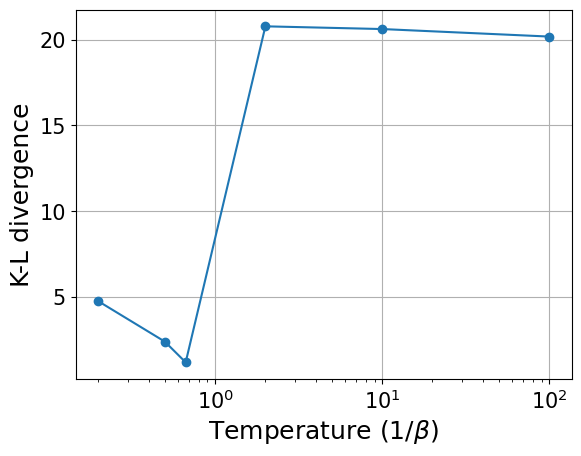

In [11]:
# -------------- Plot phase transition ----------------
print(distances2)
# plot distances vs temperature 1/beta
temps = [1/b for b in betas]
plt.plot(temps, distances2, marker='o')
plt.xscale('log')
plt.xlabel(r'Temperature ($1/\beta$)')
plt.ylabel('K-L divergence')
plt.grid()
#plt.savefig(cwd + f'/CODE/AttentionDCA_python/src/PLM/{save_dir}/phase_transition.png')
cwd = os.getcwd()
save_dir = "results/phase_transition"
save_name = "gill_pt_kl_div.png"

# Combine paths correctly
full_save_dir = os.path.join(cwd, save_dir)
os.makedirs(full_save_dir, exist_ok=True)

# Save the figure with full path
plt.savefig(os.path.join(full_save_dir, save_name), dpi=300, bbox_inches='tight')
plt.show()

In [18]:
pca_results, pca_results_data_test = return_pca_results(train_sequences_num[::10], train_sequences_num[::10])
dist,_ = kl_divergence_between_pca_distributions(pca_results, pca_results_data_test, bins=100)
print(dist)

Max diff:  0.0006891798754726534
0.015868953075617167


In [12]:
distances3 = []
cwd = '/Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main'
#save_dir = "generated_sequences"
save_dir = "gill_generated_sequences"

for b in tqdm(betas):
    filename = f'gill_generated_sequences_20000_beta_{b}'
    #filename = f'gen_seqs_randinit_Ns30000_b{b}'
    output_file = cwd + f'/CODE/AttentionDCA_python/src/PLM/{save_dir}/{filename}.npy'
    gen_sequences = np.load(output_file)
    dist = symmetric_average_minimum_distance(gen_sequences[::5], train_sequences_num[::1])
    distances3.append(dist)
distances3 = np.array(distances3)

100%|██████████| 6/6 [01:07<00:00, 11.32s/it]


[51.69062974 52.3478462  52.01163393 30.61775361 29.4472732  29.54888507]


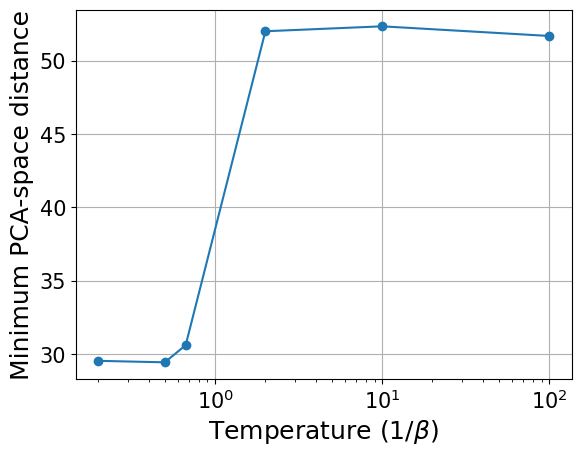

In [13]:
# -------------- Plot phase transition ----------------
print(distances3)
# plot distances vs temperature 1/beta
temps = [1/b for b in betas]
plt.plot(temps, distances3, marker='o')
plt.xscale('log')
plt.xlabel(r'Temperature ($1/\beta$)')
#plt.xlabel('Beta')
plt.ylabel('Minimum PCA-space distance')
plt.grid()
cwd = os.getcwd()
save_dir = "results/phase_transition"
save_name = "gill_pt_min_dist.png"

# Combine paths correctly
full_save_dir = os.path.join(cwd, save_dir)
os.makedirs(full_save_dir, exist_ok=True)

# Save the figure with full path
plt.savefig(os.path.join(full_save_dir, save_name), dpi=300, bbox_inches='tight')
plt.show()